In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
pd.set_option('display.max_columns', 500)

- in macro:

    year
    
    npopul999i: population

In [3]:
## Creation of corresponding table

In [9]:


"""
    Creates a new column of the dataset corresponding to the equivalent value in the corresponding table :
    ex : av becomes avenue (as it is in the corresponding table)
    
    @ df : the dataframe in which we want to create the new column
    @ df_corresp : the correspence dataframe  with a second column which is the new label we want
    @ index_column_corres : the column in the correspondence dataframe which as same data as the one in the main dataframe
    @ index_column_replacer : the column in the correspondence dataframe from which we will put the data in the new column
    @ replace_nan : the boolean to choose if we replace nan value by nothing
"""
def replace_by_correspondence(df, df_corresp, column_name, index_column_corres = 0, index_column_replacer = 1, replace_nan = False):
    column_replacer = df_corresp.columns[index_column_replacer]
    column_corres = df_corresp.columns[index_column_corres]
    df_corresp = df_corresp.rename(columns={column_corres: column_name}) # we rename the column for the join
    dictionary = df_corresp.set_index(column_name).to_dict()[column_replacer]
    df[column_name + '_corresp'] = df[column_name].map(dictionary)
    # We replace nan values by nothing
    if (replace_nan):
        df[column_name + '_corresp'] = df[column_name + '_corresp'].fillna("")
    return df



In [10]:
path_country_corresp = '../Data/Corresponding/countryCode.csv'
df_country_code = pd.read_csv(path_country_corresp, sep=';', encoding='latin-1')

## Exploration
We explore one macro dataset  for a specific country (AD)

In [11]:
macro = pd.read_csv('../Data/Raw/WID_AD_MacroData.csv',
                skiprows=7, sep=';')
macro.head()

,Variable Code,country,year,perc,agdpro999i,npopul999i,mgdpro999i,inyixx999i,xlceux999i,xlcusx999i,xlcyux999i
0,NaN,AD,2017,p0p100,34407.000000,76555.0,2.634028e+09,1.000000,1.0,0.887487,0.131302
1,NaN,AD,2016,p0p100,33668.890625,77281.0,2.601966e+09,0.993134,NaN,NaN,NaN
2,NaN,AD,2015,p0p100,32946.570312,78014.0,2.570294e+09,0.986316,NaN,NaN,NaN
3,NaN,AD,2014,p0p100,32172.791016,79223.0,2.548825e+09,0.990829,NaN,NaN,NaN
4,NaN,AD,2013,p0p100,30846.962891,80788.0,2.492065e+09,0.991824,NaN,NaN,NaN


### Get Population 

In [12]:
import glob
list_mac = glob.glob("../Data/Raw/*_MacroData.csv")

In [13]:
dfs = []
for file in list_mac:
    df = pd.read_csv(file, skiprows=7, sep=';')
    df = replace_by_correspondence(df, df_country_code, column_name = "country",index_column_corres = 1, index_column_replacer=2)
    if 'aptinc992j' in df.columns:
        df.rename(columns={'npopul999i':df['country'][0]}, inplace=True)
    else:
        continue    
    #print(df)
    new_df = df[['year',df['country'][0]]]
    dfs.append(new_df)

In [14]:
from functools import reduce
df_pop = reduce(lambda df1,df2: pd.merge(df1,df2,on='year', how='outer'), dfs)

In [15]:
df_pop = df_pop.sort_values(by=['year'], ascending=False).reset_index().drop(['index'], axis=1)
df_pop.head()

,year,PS,YE,IN,BR,SA,BH,KW,QA,CZ,LB,TH,IQ,SY,AE,OM,JO,XM,TR,FR,EG,US
0,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10544422.0,NaN,69037512.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,4797239.0,27477600.0,1.326802e+09,209567920.0,32157974.0,1396829.0,4007146.0,2291368.0,10537118.0,5988153.0,68863512.0,37547688.0,18563596.0,9266971.0,4654471.0,7747800.0,408945619.0,79622064.0,66142540.0,93383568.0,323593376.0
2,2015,4668466.0,26832216.0,1.311050e+09,207847520.0,31540372.0,1377237.0,3892115.0,2235355.0,10529983.0,5850743.0,68657600.0,36423396.0,18502412.0,9156963.0,4490541.0,7594547.0,401847547.0,78665832.0,65851544.0,91508080.0,321704000.0
3,2014,4542059.0,26183676.0,1.295292e+09,206077904.0,30886544.0,1361930.0,3753121.0,2172065.0,10524783.0,5612096.0,68416768.0,35273292.0,18772480.0,9086139.0,4236057.0,7416083.0,394542654.0,77523792.0,65558808.0,89579672.0,319233000.0
4,2013,4418341.0,25533216.0,1.279499e+09,204259376.0,30201052.0,1349427.0,3593689.0,2101288.0,10510719.0,5286990.0,68143064.0,34107368.0,19322592.0,9039978.0,3906912.0,7214832.0,387065685.0,76223640.0,65263088.0,87613912.0,316796000.0


In [ ]:
## Let's save the population csv
df_pop.to_csv('../Data/Preprocessed/Population.csv', index=False)

### get Population (données world bank)

In [16]:
# Autre source de population : https://data.worldbank.org/indicator/SP.POP.TOTL
path_pop_wb = '../Data/Raw/API_SP.POP.TOTL_DS2_en_csv_v2_10576638/API_SP.POP.TOTL_DS2_en_csv_v2_10576638.csv'
df_pop_wb = pd.read_csv(path_pop_wb, sep=',', skiprows=4,encoding='utf-8')

In [17]:
df_pop_wb.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,12840299.0,13067538.0,13237734.0,13306695.0,13248370.0,13053954.0,12749645.0,12389269.0,12047115.0,11783050.0,11601041.0,11502761.0,11540888.0,11777609.0,12249114.0,12993657.0,13981231.0,15095099.0,16172719.0,17099541.0,17822884.0,18381605.0,18863999.0,19403676.0,20093756.0,20966463.0,21979923.0,23064851.0,24118979.0,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,6776381.0,6927269.0,7094834.0,7277960.0,7474338.0,7682479.0,7900997.0,8130988.0,8376147.0,8641521.0,8929900.0,9244507.0,9582156.0,9931562.0,10277321.0,10609042.0,10921037.0,11218268.0,11513968.0,11827237.0,12171441.0,12553446.0,12968345.0,13403734.0,13841301.0,14268994.0,14682284.0,15088981.0,15504318.0,15949766.0,16440924.0,16983266.0,17572649.0,18203369.0,18865716.0,19552542.0,20262399.0,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80991.0,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN,NaN


In [18]:
df_pop_wb_fin = df_pop_wb
dropcol = ["Indicator Name","Indicator Code","Unnamed: 63","Country Name","Country Code","2018"]
CC = df_pop_wb_fin.loc[:,['Country Code']].values.flatten().tolist()
df_pop_wb_fin = df_pop_wb_fin.drop(dropcol,axis=1)
df_pop_wb_fin = df_pop_wb_fin.T
df_pop_wb_fin.columns = CC

In [19]:
df_pop_wb_fin.head()

,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,ASM,ATG,AUS,AUT,AZE,BDI,BEL,BEN,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BLZ,BMU,BOL,BRA,BRB,BRN,BTN,BWA,CAF,CAN,CEB,CHE,CHI,CHL,CHN,CIV,CMR,COD,COG,COL,COM,CPV,CRI,CSS,CUB,CUW,CYM,CYP,CZE,DEU,DJI,DMA,DNK,DOM,DZA,EAP,EAR,EAS,ECA,ECS,ECU,EGY,EMU,ERI,ESP,EST,ETH,EUU,FCS,FIN,FJI,FRA,FRO,FSM,GAB,GBR,GEO,GHA,GIB,GIN,GMB,GNB,GNQ,GRC,GRD,GRL,GTM,GUM,GUY,HIC,HKG,HND,HPC,HRV,HTI,HUN,IBD,IBT,IDA,IDB,IDN,IDX,IMN,IND,INX,IRL,IRN,IRQ,ISL,ISR,ITA,JAM,JOR,JPN,KAZ,KEN,KGZ,KHM,KIR,KNA,KOR,KWT,LAC,LAO,LBN,LBR,LBY,LCA,LCN,LDC,LIC,LIE,LKA,LMC,LMY,LSO,LTE,LTU,LUX,LVA,MAC,MAF,MAR,MCO,MDA,MDG,MDV,MEA,MEX,MHL,MIC,MKD,MLI,MLT,MMR,MNA,MNE,MNG,MNP,MOZ,MRT,MUS,MWI,MYS,NAC,NAM,NCL,NER,NGA,NIC,NLD,NOR,NPL,NRU,NZL,OED,OMN,OSS,PAK,PAN,PER,PHL,PLW,PNG,POL,PRE,PRI,PRK,PRT,PRY,PSE,PSS,PST,PYF,QAT,ROU,RUS,RWA,SAS,SAU,SDN,SEN,SGP,SLB,SLE,SLV,SMR,SOM,SRB,SSA,SSD,SSF,SST,STP,SUR,SVK,SVN,SWE,SWZ,SXM,SYC,SYR,TCA,TCD,TEA,TEC,TGO,THA,TJK,TKM,TLA,TLS,TMN,TON,TSA,TSS,TTO,TUN,TUR,TUV,TZA,UGA,UKR,UMC,URY,USA,UZB,VCT,VEN,VGB,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1960,54211.0,8996351.0,5643182.0,1608800.0,13411.0,92490932.0,92634.0,20619075.0,1874120.0,20013.0,55339.0,10276477.0,7047539.0,3895396.0,2786106.0,9153489.0,2431622.0,4829288.0,48199747.0,7867374.0,162427.0,109528.0,3225668.0,8198000.0,92064.0,44400.0,3693449.0,72207554.0,230939.0,81745.0,223288.0,524552.0,1503508.0,17909009.0,91401764.0,5327827.0,109420.0,7716625.0,667070000.0,3558988.0,5176268.0,15248251.0,1037220.0,16480383.0,191121.0,202310.0,1333040.0,4198307.0,7141135.0,124826.0,7865.0,572930.0,9602006.0,72814900.0,83636.0,60011.0,4579603.0,3294042.0,11124888.0,893956327.0,9.792874e+08,1.040034e+09,274947938.0,667246565.0,4545550.0,26996533.0,265396502.0,1397491.0,30455000.0,1211537.0,22151278.0,409498644.0,119967877.0,4429634.0,393386.0,46814237.0,34661.0,44537.0,499184.0,52400000.0,3645600.0,6652287.0,23394.0,3577409.0,367928.0,616409.0,255323.0,8331725.0,89869.0,32500.0,4210747.0,66742.0,571819.0,780591817.0,3075605.0,2038637.0,162495580.0,4140181.0,3866159.0,9983967.0,1.917375e+09,2.299864e+09,382489740.0,123195063.0,87792515.0,259294677.0,48442.0,449480608.0,NaN,2828600.0,21906903.0,7289761.0,175574.0,2114020.0,50199700.0,1628252.0,932257.0,92500572.0,9714260.0,8105440.0,2172300.0,5722370.0,41233.0,51195.0,25012374.0,269618.0,184536470.0,2120896.0,1804926.0,1120313.0,1448417.0,89897.0,220434662.0,240742196.0,166502848.0,16495.0,9874481.0,9.345867e+08,2.251658e+09,851591.0,1.097221e+09,2778550.0,313970.0,2120979.0,167796.0,4279.0,12328532.0,22452.0,2544000.0,5099373.0,89887.0,105488678.0,38174112.0,14662.0,2.085156e+09,1488667.0,5263733.0,326550.0,20986123.0,97837766.0,480579.0,955505.0,10035.0,7388695.0,858168.0,659351.0,3618595.0,8157106.0,198624409.0,602544.0,79000.0,3388764.0,45137812.0,1774699.0,11486631.0,3581239.0,10063011.0,4433.0,2371800.0,791487664.0,551740.0,9196324.0,44908293.0,1132921.0,10061515.0,26273025.0,9642.0,2010677.0,29637450.0,188636191.0,2358000.0,11424176.0,8857716.0,1902875.0,NaN,865809.0,754705477.0,78076.0,47384.0,18406905.0,119897000.0,2933428.0,571835666.0,4086539.0,7544491.0,3206749.0,1646400.0,117866.0,2297110.0,2762899.0,15397.0,2755947.0,NaN,228544305.0,2955152.0,228586005.0,14260440.0,64253.0,289966.0,4068095.0,1584720.0,7484656.0,349174.0,NaN,41700.0,4573512.0,5726.0,3001593.0,882521780.0,308725569.0,1580513.0,27397175.0,2087038.0,1603258.0,210357620.0,499950.0,97837766.0,61601.0,571835666.0,228586005.0,848479.0,4176266.0,27472331.0,6104.0,10074507.0,6788214.0,42662149.0,1.150569e+09,2538651.0,180671000.0,8549493.0,80949.0,8146847.0,8033.0,32500.0,32670629.0,63699.0,3.032250e+09,108646.0,947000.0,5172135.0,17456855.0,3044846.0,3747369.0
1961,55438.0,9166764.0,5753024.0,1659800.0,14375.0,95044497.0,101078.0,20953077.0,1941491.0,20486.0,56144.0,10483000.0,7086299.0,4030320.0,2839666.0,9183948.0,2465867.0,4894580.0,49592802.0,7943118.0,167894.0,115108.0,3288602.0,8271216.0,94703.0,45500.0,3764813.0,74351763.0,231678.0,85596.0,228918.0,537249.0,1529

In [52]:
## Let's save the pop csv (données world bank)
df_pop_wb_fin.to_csv('../Data/Preprocessed/Population_wb.csv', index=True)

- in inequality:
    
    aptinc992j/i: income
    
    bfiinc992i: inverse of pareto index

In [20]:
import glob
list_ineq = glob.glob("../Data/Raw/*_InequalityData.csv")

### Get income

Remarque : les incomes présents dans les données wid sont en monnaie locale constante (2015).

In [21]:
dfs = []
for file in list_ineq:
    df = pd.read_csv(file, skiprows=7, sep=';')
    df = replace_by_correspondence(df, df_country_code, column_name = "country",index_column_corres = 1, index_column_replacer=2 )

    df = df[df.perc == 'p0p100']
    if 'aptinc992j' in df.columns:
        df.rename(columns={'aptinc992j':df['country_corresp'][0]}, inplace=True)
    elif 'aptinc992i' in df.columns:
        df.rename(columns={'aptinc992i':df['country_corresp'][0]}, inplace=True)
    else:
        continue    
    new_df = df[['year',df['country_corresp'][0]]]
    dfs.append(new_df)

In [22]:
from functools import reduce
df_income = reduce(lambda df1,df2: pd.merge(df1,df2,on='year', how='outer'), dfs)

In [23]:
df_income = df_income.sort_values(by=['year'], ascending=False).reset_index().drop(['index'], axis=1)

In [24]:
df_income.head()

,year,ARE,SGP,USA,MWI,PSE,ARG,TUR,KEN,KOR,MUS,HUN,NOR,OMN,KWT,GHA,BRA,JOR,EGY,ZWE,DNK,AUS,NGA,ESP,MYS,IND,QAT,CZE,GBR,THA,UGA,ZAF,SAU,LBN,ZMB,IRQ,YEM,BHR,RUS,XXM,SYC,ITA,URY,SYR,JPN,FRA,NZL
0,2016,NaN,NaN,NaN,NaN,NaN,NaN,34634.992532,NaN,32982536.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223927.210771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10060.716948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,NaN,NaN,NaN,NaN,NaN,NaN,34293.839455,NaN,32304968.0,NaN,NaN,NaN,NaN,NaN,NaN,37113.481525,NaN,45416.167245,NaN,NaN,76496.224809,NaN,NaN,NaN,NaN,NaN,399086.656076,NaN,214121.560052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8686.009934,643350.260535,9990.553891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,NaN,79168.007812,67454.505940,NaN,NaN,NaN,33889.649085,NaN,31827440.0,NaN,NaN,NaN,NaN,NaN,NaN,39518.882834,NaN,NaN,NaN,NaN,75941.754421,NaN,NaN,NaN,NaN,NaN,377301.347352,32403.920127,209758.606822,NaN,NaN,NaN,1.646583e+07,NaN,NaN,NaN,NaN,673909.280602,9874.237468,NaN,NaN,NaN,NaN,NaN,35777.836,63744.710938
3,2013,NaN,78772.218750,66210.526868,NaN,NaN,NaN,33620.144479,NaN,31432330.0,NaN,NaN,NaN,NaN,14982.984682,NaN,42218.102581,5631.914627,NaN,NaN,NaN,75788.279105,NaN,NaN,NaN,139758.528611,NaN,370644.531755,32151.775152,207294.237941,NaN,NaN,NaN,1.693425e+07,NaN,NaN,NaN,NaN,670470.803252,9795.628558,NaN,NaN,NaN,NaN,NaN,35566.770,62219.886719
4,2012,NaN,76919.367188,65976.022668,NaN,NaN,NaN,33069.504234,NaN,31081460.0,NaN,NaN,NaN,NaN,NaN,NaN,40562.313406,NaN,43565.152081,NaN,NaN,75230.553798,NaN,22849.808594,46884.574219,134295.200980,254851.215558,374243.579835,31886.933118,209108.689268,NaN,119600.34375,NaN,1.867175e+07,NaN,NaN,NaN,NaN,673087.474626,9762.094695,NaN,NaN,496473.125,NaN,NaN,35468.711,60186.812500


In [17]:
## Let's save the income csv
df_income.to_csv('../Data/Preprocessed/Income.csv', index=False)

### Convert Income in 2015 USD

In [30]:
# Source : https://data.oecd.org/fr/conversion/taux-de-change.htm
path_convInc = '../Data/Raw/DP_LIVE_14062019151915470.csv'
df_convInc = pd.read_csv(path_convInc, sep=',', encoding='utf-8')
df_convInc = df_convInc[df_convInc['TIME'] == 2015]
# CCC = liste des pays pour lesquels on a le taux de conversion
CCC = df_convInc.loc[:,['LOCATION']].values.flatten().tolist()

In [26]:
df_convInc.head(2)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
65,AUS,EXCH,TOT,NATUSD,A,2015,1.331090,NaN
134,AUT,EXCH,TOT,NATUSD,A,2015,0.901659,NaN


In [31]:
# Dictionnaire key=LOCATION, value=Value
dicConvert = dict()
for c in CCC:
    dicConvert[c] = round(df_convInc[df_convInc['LOCATION'] == c]['Value'].values[0],5)
    
# Dictionnaire enrichi grace au site https://www.exchange-rates.org/Rate/USD/MYR/1-30-2015
p_enr = ['ARE', 'SGP', 'MWI', 'KEN', 'MUS', 'OMN', 'KWT', 'GHA', 'JOR', 'EGY', 'NGA', 'MYS', 'QAT', 'THA', 'UGA', 'LBN', 'ZMB', 'IRQ', 'YEM', 'SYC', 'URY', 'SYR']
v_enr = [3.6730, 1.4188, 555.00, 102.86, 35.4908,161.73,0.30339,3.8102,0.70910,7.8543 ,199.56,4.3031,17.3487,36.1514,3401.52,1516.38,11.0605,1102.02,215.08,13.0527,29.9138,188.86]
for p,v in zip(p_enr[:len(v_enr)],v_enr):
    dicConvert[p] = v

In [32]:
colpays = df_income.columns.values.flatten().tolist()[1:]
mp = []
nmp = []
for c in colpays:
    if c in dicConvert.keys():
        try:
            mp.append(c)
        except:
            pass
    else :
        nmp.append(c)
print('Pays dans df_income, dont on connait le taux de change :',mp)
print('Pays dans df_income, dont on ne connait pas le taux de change :',nmp)

Pays dans df_income, dont on connait le taux de change : ['ARE', 'SGP', 'USA', 'MWI', 'ARG', 'TUR', 'KEN', 'KOR', 'MUS', 'HUN', 'NOR', 'OMN', 'KWT', 'GHA', 'BRA', 'JOR', 'EGY', 'DNK', 'AUS', 'NGA', 'ESP', 'MYS', 'IND', 'QAT', 'CZE', 'GBR', 'THA', 'UGA', 'ZAF', 'SAU', 'LBN', 'ZMB', 'IRQ', 'YEM', 'RUS', 'SYC', 'ITA', 'URY', 'SYR', 'JPN', 'FRA', 'NZL']
Pays dans df_income, dont on ne connait pas le taux de change : ['PSE', 'ZWE', 'BHR', 'XXM']


In [39]:
# 1€ = 1.12$
l_index = df_income.year
df_income_converted = df_income[mp]
df_income_converted.index=l_index

for c in mp:
    df_income_converted[c] = round(df_income_converted[c] / dicConvert[c])


/home/home/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [40]:
df_income_converted.head()

,ARE,SGP,USA,MWI,ARG,TUR,KEN,KOR,MUS,HUN,NOR,OMN,KWT,GHA,BRA,JOR,EGY,DNK,AUS,NGA,ESP,MYS,IND,QAT,CZE,GBR,THA,UGA,ZAF,SAU,LBN,ZMB,IRQ,YEM,RUS,SYC,ITA,URY,SYR,JPN,FRA,NZL
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,12733.0,NaN,29158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,12608.0,NaN,28559.0,NaN,NaN,NaN,NaN,NaN,NaN,11156.0,NaN,5782.0,NaN,57469.0,NaN,NaN,NaN,NaN,NaN,16224.0,NaN,5923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,55799.0,67455.0,NaN,NaN,12459.0,NaN,28137.0,NaN,NaN,NaN,NaN,NaN,NaN,11879.0,NaN,NaN,NaN,57052.0,NaN,NaN,NaN,NaN,NaN,15338.0,49506.0,5802.0,NaN,NaN,NaN,10859.0,NaN,NaN,NaN,11059.0,NaN,NaN,NaN,NaN,NaN,39680.0,44453.0
2013,NaN,55520.0,66211.0,NaN,NaN,12360.0,NaN,27788.0,NaN,NaN,NaN,NaN,49385.0,NaN,12690.0,7942.0,NaN,NaN,56937.0,NaN,NaN,NaN,2179.0,NaN,15068.0,49121.0,5734.0,NaN,NaN,NaN,11168.0,NaN,NaN,NaN,11003.0,NaN,NaN,NaN,NaN,NaN,39446.0,43390.0
2012,NaN,54214.0,65976.0,NaN,NaN,12158.0,NaN,27478.0,NaN,NaN,NaN,NaN,NaN,NaN,12192.0,NaN,5547.0,NaN,56518.0,NaN,25342.0,10896.0,2093.0,14690.0,15214.0,48717.0,5784.0,NaN,9374.0,NaN,12313.0,NaN,NaN,NaN,11046.0,NaN,NaN,16597.0,NaN,NaN,39337.0,41972.0


In [43]:
## Let's save the income csv
df_income_converted.to_csv('../Data/Preprocessed/Income_converted.csv', index=True)

### Get wealth

In [18]:
dfs = []
for file in list_ineq:
    df = pd.read_csv(file, skiprows=7, sep=';')
    df = replace_by_correspondence(df, df_country_code,  column_name = "country",index_column_corres = 1, index_column_replacer=2)
    df = df[df.perc == 'p0p100']
    if 'ahweal992i' in df.columns:
        df.rename(columns={'ahweal992i':df['country_corresp'][0]}, inplace=True)
    else:
        continue    
    new_df = df[['year',df['country_corresp'][0]]]
    dfs.append(new_df)

In [19]:
from functools import reduce
df_wealth = reduce(lambda df1,df2: pd.merge(df1,df2,on='year', how='outer'), dfs)

In [20]:
df_wealth = df_wealth.sort_values(by=['year'], ascending=False).reset_index().drop(['index'], axis=1)

In [21]:
df_wealth.head()

,year,CZE,DNK,FIN,FRA,GBR,ITA,JPN,KOR,NLD,NOR,RUS,SGP,TWN,USA
0,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,NaN,NaN,NaN,205132.08,NaN,NaN,2.362440e+07,NaN,NaN,1.839850e+06,2384569.50,NaN,NaN,310446.406250
2,2014,1.119289e+06,1.577861e+06,130630.065261,205493.81,NaN,NaN,2.371549e+07,NaN,206503.912384,1.732195e+06,2446600.25,349725.4375,NaN,302686.625000
3,2013,1.117217e+06,1.518426e+06,128698.777511,206265.06,NaN,183513.628205,2.331834e+07,104694416.0,202714.176358,1.675399e+06,2395503.50,347189.7500,NaN,280457.968750
4,2012,1.109685e+06,1.472944e+06,125187.398308,206382.17,118429.295896,188315.922724,2.246090e+07,105053832.0,209985.756166,1.617766e+06,2281087.75,335128.7500,4697967.5,252429.234375


In [22]:
## Let's save the income csv
df_wealth.to_csv('../Data/Preprocessed//Wealth.csv', index=False)

## Get Gini

In [122]:
# Source : https://data.worldbank.org/indicator/SI.POV.GINI?view=map&year=2000
path_gini = '../Data/Raw/API_SI.POV.GINI_DS2_en_csv_v2_10576671/API_SI.POV.GINI_DS2_en_csv_v2_10576671.csv'
df_gini = pd.read_csv(path_gini, sep=',', skiprows=4,encoding='utf-8')

In [24]:
df_gini.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,31.7,NaN,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
# Suppresion de certaines colonnes
df_gini2000 = df_gini
coupure = 1960
nbAn = 2018 - coupure
print(nbAn)

# Si l'on souhaite ne garder que certains années
#for i in range(1960,1990):
    #df_gini2000 = df_gini2000.drop(columns=str(i))

dropcol = ["Indicator Name","Indicator Code","Unnamed: 63","Country Name","Country Code","2018"]
CN = df_gini2000.loc[:,['Country Name']].values.flatten().tolist()
CC = df_gini2000.loc[:,['Country Code']].values.flatten().tolist()

df_gini2000 = df_gini2000.drop(dropcol,axis=1)    

df_gini2000 = df_gini2000.T
df_gini2000.columns = CC

# Suprresion des pays pour lesquels on n'a pas de valeur de gini
sumna = df_gini2000.isnull().sum(axis = 0)
nogini = sumna[sumna == nbAn].index.tolist()
for p in nogini:
    df_gini2000 = df_gini2000.drop(columns=p)
sumna = df_gini2000.isnull().sum(axis = 0)

print(df_gini2000.shape)


58
(58, 164)


In [127]:
# Dictionnaire CountryCode:CountryName
dicCodeName = {c:n for c,n in zip(CC, CN)}
dicNameCode = {n:c for n,c in zip(CN, CC)}

In [26]:
sumna = df_gini2000.isnull().sum(axis = 0)

In [27]:
sumna[sumna < 30].index.tolist()

['ARG', 'BRA', 'CRI']

In [28]:
import matplotlib.pyplot as plt
# Nb de NA par Pays
plt.hist(sumna,bins=(nbAn))

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  2.,  2.,  0.,  5.,  0.,  2.,  0.,  4.,
         0.,  3.,  0.,  1.,  0.,  0.,  3.,  0.,  4.,  0., 18.,  0.,  8.,
         6.,  0.,  7.,  0.,  4.,  0.,  5.,  0.,  7.,  8.,  0., 10.,  0.,
        13.,  0., 14.,  0., 17., 15.]),
 array([25.        , 25.55172414, 26.10344828, 26.65517241, 27.20689655,
        27.75862069, 28.31034483, 28.86206897, 29.4137931 , 29.96551724,
        30.51724138, 31.06896552, 31.62068966, 32.17241379, 32.72413793,
        33.27586207, 33.82758621, 34.37931034, 34.93103448, 35.48275862,
        36.03448276, 36.5862069 , 37.13793103, 37.68965517, 38.24137931,
        38.79310345, 39.34482759, 39.89655172, 40.44827586, 41.        ,
        41.55172414, 42.10344828, 42.65517241, 43.20689655, 43.75862069,
        44.31034483, 44.86206897, 45.4137931 , 45.96551724, 46.51724138,
        47.06896552, 47.62068966, 48.17241379, 48.72413793, 49.27586207,
        49.

In [29]:
# FillNA par interpolate
def ReplaceNA_gini(df):
    dffillna = df.interpolate(method='linear', axis=0).ffill().bfill()
    return dffillna

In [30]:
# FillNA
df_gini_FillNA = df_gini2000
for p in df_gini_FillNA.columns:
    df_gini_FillNA.loc[:,[p]] = ReplaceNA_gini(df_gini_FillNA.loc[:,[p]])
df_gini_FillNA = round(df_gini_FillNA,1)   

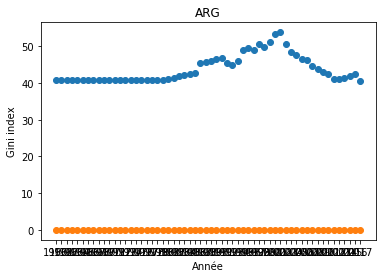

In [31]:
# Visualisation du fillNA
def ReplaceNA(df):
    dfavecna = df.fillna(0)
    dffillna = df.interpolate(method='linear', axis=0).ffill().bfill()
    dfdiff = dffillna - dfavecna
    plt.plot(dfavecna,'o')
    plt.plot(dfdiff,'o')
    plt.title(df.columns[0])
    plt.xlabel("Année")
    plt.ylabel("Gini index")
    return dffillna
    
dfssNA = ReplaceNA(df_gini2000.loc[:,["ARG"]])

In [32]:
## Let's save the gini csv
df_gini2000.to_csv('../Data/Preprocessed/Gini_beforeFillNA.csv', index=True)

In [33]:
## Let's save the gini csv
df_gini_FillNA.to_csv('../Data/Preprocessed/Gini_afterFillNA.csv', index=True)

In [34]:
# Visualisation des pays ayant eu la plus grande variation d'indice de Gini
def MaxAmpGini(df,Pays):
    return round(100*(df.loc[:,[Pays]].max()-df.loc[:,[Pays]].min())/df.loc[:,[Pays]].min(),1)
mARG = MaxAmpGini(df_gini2000,"ARG")

In [35]:
for p in df_gini2000.columns:
    mag = MaxAmpGini(df_gini2000,p)[0]
    if mag > 50:
        print(p,mag)

CRI 50.9
HUN 65.2
KGZ 73.1
MDA 64.5
MLI 52.7
MRT 53.7
MWI 64.9
ROU 70.0
RWA 79.9
UKR 63.7


## Get PIB

In [36]:
# Source : https://donnees.banquemondiale.org/indicateur/NY.GDP.MKTP.CD
path_PIB = '../Data/Raw/API_NY.GDP.MKTP.CD_DS2_fr_csv_v2_10581919/API_NY.GDP.MKTP.CD_DS2_fr_csv_v2_10581919.csv'
df_pib = pd.read_csv(path_PIB, sep=',', skiprows=4,encoding='utf-8')

In [37]:
df_pib.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,PIB ($ US courants),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.054634e+08,4.876025e+08,5.964236e+08,6.953044e+08,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN
1,Afghanistan,AFG,PIB ($ US courants),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010923e+10,1.243909e+10,1.585657e+10,1.780429e+10,1.990732e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.904636e+10,1.954398e+10,NaN,NaN
2,Angola,AGO,PIB ($ US courants),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,NaN,NaN
3,Albanie,ALB,PIB ($ US courants),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.857338e+09,1.897050e+09,2.097326e+09,2.080796e+09,2.051236e+09,2.253090e+09,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880952e+09,2.392765e+09,3.199641e+09,2.258514e+09,2.545965e+09,3.212122e+09,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052074e+09,8.896073e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.188368e+10,1.303854e+10,NaN,NaN
4,Andorre,AND,PIB ($ US courants),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.861921e+07,8.940982e+07,1.134082e+08,1.508201e+08,1.865587e+08,2.201272e+08,2.272810e+08,2.540202e+08,3.080089e+08,4.115783e+08,4.464161e+08,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08,6.113164e+08,7.214259e+08,7.954493e+08,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,1.434430e+09,1.496913e+09,1.733117e+09,2.398646e+09,2.935659e+09,3.255789e+09,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN,NaN


In [38]:
df_pib2000 = df_pib
coupure = 1960
nbAn = 2018 - coupure
print(nbAn)

# Si l'on souhaite supprimer certaines années
#for i in range(1960,1990):
    #df_pib2000 = df_pib2000.drop(columns=str(i))
    
df_pib2000 = df_pib2000.drop(columns="Indicator Name")
df_pib2000 = df_pib2000.drop(columns="Indicator Code")
df_pib2000 = df_pib2000.drop(columns="Unnamed: 63")
CN = df_pib2000.loc[:,['Country Name']].values.flatten().tolist()
CC = df_pib2000.loc[:,['Country Code']].values.flatten().tolist()
df_pib2000 = df_pib2000.drop(columns="Country Name")
df_pib2000 = df_pib2000.drop(columns="Country Code")
df_pib2000 = df_pib2000.drop(columns="2018")
df_pib2000 = df_pib2000.T
df_pib2000.columns = CC

print(df_pib2000.shape)
df_pib2000.head()

58
(58, 264)


,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,ASM,ATG,AUS,AUT,AZE,BDI,BEL,BEN,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BLZ,BMU,BOL,BRA,BRB,BRN,BTN,BWA,CAF,CAN,CEB,CHE,CHI,CHL,CHN,CIV,CMR,COD,COG,COL,COM,CPV,CRI,CSS,CUB,CUW,CYM,CYP,CZE,DEU,DJI,DMA,DNK,DOM,DZA,EAP,EAR,EAS,ECA,ECS,ECU,EGY,EMU,ERI,ESP,EST,ETH,EUU,FCS,FIN,FJI,FRA,FRO,FSM,GAB,GBR,GEO,GHA,GIB,GIN,GMB,GNB,GNQ,GRC,GRD,GRL,GTM,GUM,GUY,HIC,HKG,HND,HPC,HRV,HTI,HUN,IBD,IBT,IDA,IDB,IDN,IDX,IMN,IND,INX,IRL,IRN,IRQ,ISL,ISR,ITA,JAM,JOR,JPN,KAZ,KEN,KGZ,KHM,KIR,KNA,KOR,KWT,LAC,LAO,LBN,LBR,LBY,LCA,LCN,LDC,LIC,LIE,LKA,LMC,LMY,LSO,LTE,LTU,LUX,LVA,MAC,MAF,MAR,MCO,MDA,MDG,MDV,MEA,MEX,MHL,MIC,MKD,MLI,MLT,MMR,MNA,MNE,MNG,MNP,MOZ,MRT,MUS,MWI,MYS,NAC,NAM,NCL,NER,NGA,NIC,NLD,NOR,NPL,NRU,NZL,OED,OMN,OSS,PAK,PAN,PER,PHL,PLW,PNG,POL,PRE,PRI,PRK,PRT,PRY,PSE,PSS,PST,PYF,QAT,ROU,RUS,RWA,SAS,SAU,SDN,SEN,SGP,SLB,SLE,SLV,SMR,SOM,SRB,SSA,SSD,SSF,SST,STP,SUR,SVK,SVN,SWE,SWZ,SXM,SYC,SYR,TCA,TCD,TEA,TEC,TGO,THA,TJK,TKM,TLA,TLS,TMN,TON,TSA,TSS,TTO,TUN,TUR,TUV,TZA,UGA,UKR,UMC,URY,USA,UZB,VCT,VEN,VGB,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1960,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.857319e+10,6.592694e+09,NaN,195999990.0,1.165872e+10,2.261956e+08,3.304428e+08,4.274894e+09,NaN,NaN,1.698039e+08,NaN,NaN,2.807189e+07,8.446665e+07,3.738794e+08,1.516557e+10,NaN,NaN,NaN,3.041231e+07,1.121556e+08,4.109345e+10,NaN,9.522747e+09,NaN,4.110000e+09,5.971647e+10,5.462036e+08,6.187410e+08,3.359404e+09,1.317319e+08,4.031153e+09,NaN,NaN,5.075138e+08,1.875398e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.248947e+09,6.723997e+08,2.723649e+09,8.025455e+10,1.527241e+11,1.532550e+11,NaN,4.367249e+11,2.069465e+09,NaN,2.454812e+11,NaN,1.207213e+10,NaN,NaN,3.590294e+11,NaN,5.224102e+09,1.123284e+08,6.265147e+10,NaN,NaN,1.414690e+08,7.232805e+10,NaN,1.217230e+09,NaN,NaN,NaN,NaN,NaN,4.446528e+09,NaN,NaN,1.043600e+09,NaN,1.702152e+08,1.083658e+12,1.320797e+09,335650000.0,1.738556e+10,NaN,273187200.0,NaN,3.034966e+11,3.401969e+11,3.788150e+10,1.216359e+10,NaN,2.656245e+10,NaN,3.702988e+10,NaN,1.939330e+09,4.199134e+09,1.684122e+09,2.484341e+08,2.598500e+09,4.038529e+10,6.990507e+08,NaN,4.430734e+10,NaN,7.912655e+08,NaN,6.371429e+08,NaN,1.236656e+07,3.957874e+09,NaN,5.244690e+10,NaN,NaN,NaN,NaN,NaN,8.150463e+10,NaN,NaN,NaN,1.409874e+09,NaN,3.019345e+11,3.457931e+07,1.828621e+11,NaN,7.039257e+08,NaN,NaN,NaN,2.037151e+09,NaN,NaN,6.730817e+08,NaN,NaN,1.304000e+10,NaN,2.862953e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.260922e+07,NaN,1.629567e+08,1.916242e+09,5.844779e+11,NaN,NaN,4.495269e+08,4.196092e+09,2.238547e+08,1.227673e+10,5.163272e+09,5.083344e+08,NaN,5.485855e+09,1.071007e+12,NaN,NaN,3.707056e+09,537147100.0,2.571908e+09,6.684569e+09,NaN,2.304960e+08,NaN,1.105973e+10,1.691900e+09,NaN,3.193200e+09,NaN,NaN,NaN,1.044217e+12,NaN,NaN,NaN,NaN,119000024.0,4.713339e+10,NaN,1.307333e+09,1.003692e+09,7.044623e+08,NaN,3.220095e+08,NaN,NaN,NaN,NaN,2.969358e+10,NaN,2.970484e+10,NaN,NaN,99650000.0,NaN,NaN,1.484287e+10,3.507616e+07,NaN,1.201203e+07,8.577044e+08,NaN,3.135827e+08,8.008904e+10,NaN,1.211281e+08,2.760747e+09,NaN,NaN,7.670225e+10,NaN,NaN,NaN,4.713339e+10,2.970484e+10,5.356701e+08,NaN,1.399507e+10,NaN,NaN,4.230084e+08,NaN,1.959031e+11,1.242289e+09,5.433000e+11,NaN,1.306656e+07,7.779091e+09,NaN,24200000.0,NaN,NaN,1.371564e+12,NaN,NaN,NaN,7.575248e+09,7.130000e+08,1.052990e+09
1961,NaN,5.488889e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.964834e+10,7.311750e+09,NaN,202999992.0,1.240015e+10,2.356682e+08,3.502472e+08,4.817580e+09,NaN,NaN,1.900980e+08,NaN,NaN,2.996437e+07,8.924999e+07,4.066846e+08,1.523685e+10,NaN,NaN,NaN,3.290234e+07,1.231346e+08,4.076797e+10,NaN,1.071271e+10,NaN,4.609727e+09,5.005687e+10,6.182456e+08,6.575974e+08,3.086747e+09,1.516757e+08,4.540448e+09,NaN,NaN,4.903252e+08,2.032981e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.933842e+09,6.541002e+08,2.434777e+09,7.044958e+10,1.534656e+11,1.537028e+11,NaN,4.648855e+11,1.753850e+09,NaN,2.702096e+11,NaN,1.383430e+10,NaN,NaN,3.908872e+11,NaN,5.921659e+09,1.169878e+08,6.834674e+10,NaN,NaN,1.676379e

In [39]:
## Let's save the pib csv
df_pib2000.to_csv('../Data/Preprocessed/PIB_beforeFillNA.csv', index=True)

In [40]:
# FillNA par interpolate
def ReplaceNA_pib(df):
    dffillna = df.interpolate(method='linear', axis=0).ffill().bfill()
    return dffillna

In [41]:
# FillNA de PIB
df_pib_FillNA = df_pib2000
for p in df_pib_FillNA.columns:
    df_pib_FillNA.loc[:,[p]] = ReplaceNA_pib(df_pib_FillNA.loc[:,[p]])
df_pib_FillNA = round(df_pib_FillNA,0)   

In [42]:
df_pib_FillNA.head()

,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,ASM,ATG,AUS,AUT,AZE,BDI,BEL,BEN,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BLZ,BMU,BOL,BRA,BRB,BRN,BTN,BWA,CAF,CAN,CEB,CHE,CHI,CHL,CHN,CIV,CMR,COD,COG,COL,COM,CPV,CRI,CSS,CUB,CUW,CYM,CYP,CZE,DEU,DJI,DMA,DNK,DOM,DZA,EAP,EAR,EAS,ECA,ECS,ECU,EGY,EMU,ERI,ESP,EST,ETH,EUU,FCS,FIN,FJI,FRA,FRO,FSM,GAB,GBR,GEO,GHA,GIB,GIN,GMB,GNB,GNQ,GRC,GRD,GRL,GTM,GUM,GUY,HIC,HKG,HND,HPC,HRV,HTI,HUN,IBD,IBT,IDA,IDB,IDN,IDX,IMN,IND,INX,IRL,IRN,IRQ,ISL,ISR,ITA,JAM,JOR,JPN,KAZ,KEN,KGZ,KHM,KIR,KNA,KOR,KWT,LAC,LAO,LBN,LBR,LBY,LCA,LCN,LDC,LIC,LIE,LKA,LMC,LMY,LSO,LTE,LTU,LUX,LVA,MAC,MAF,MAR,MCO,MDA,MDG,MDV,MEA,MEX,MHL,MIC,MKD,MLI,MLT,MMR,MNA,MNE,MNG,MNP,MOZ,MRT,MUS,MWI,MYS,NAC,NAM,NCL,NER,NGA,NIC,NLD,NOR,NPL,NRU,NZL,OED,OMN,OSS,PAK,PAN,PER,PHL,PLW,PNG,POL,PRE,PRI,PRK,PRT,PRY,PSE,PSS,PST,PYF,QAT,ROU,RUS,RWA,SAS,SAU,SDN,SEN,SGP,SLB,SLE,SLV,SMR,SOM,SRB,SSA,SSD,SSF,SST,STP,SUR,SVK,SVN,SWE,SWZ,SXM,SYC,SYR,TCA,TCD,TEA,TEC,TGO,THA,TJK,TKM,TLA,TLS,TMN,TON,TSA,TSS,TTO,TUN,TUR,TUV,TZA,UGA,UKR,UMC,URY,USA,UZB,VCT,VEN,VGB,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1960,405463417.0,537777811.0,5.930503e+09,1.857338e+09,78619206.0,2.560218e+10,1.472067e+10,2.445060e+10,2.256839e+09,514000000.0,77496754.0,1.857319e+10,6.592694e+09,9.063444e+09,195999990.0,1.165872e+10,226195579.0,330442817.0,4.274894e+09,1.983923e+10,3.072698e+09,169803922.0,1.255802e+09,2.165000e+10,28071889.0,84466654.0,373879364.0,1.516557e+10,311809337.0,114040246.0,135653295.0,30412309.0,112155599.0,4.109345e+10,2.563911e+11,9.522747e+09,5.945677e+09,4.110000e+09,5.971647e+10,546203562.0,618740988.0,3.359404e+09,131731863.0,4.031153e+09,212218226.0,142246876.0,507513830.0,1.875398e+09,5.693005e+09,NaN,2.315973e+09,489914761.0,4.047740e+10,2.150218e+11,340989528.0,45872947.0,6.248947e+09,6.723997e+08,2.723649e+09,8.025455e+10,1.527241e+11,1.532550e+11,9.043596e+11,4.367249e+11,2.069465e+09,4.948668e+09,2.454812e+11,477101652.0,1.207213e+10,4.373665e+09,7.324903e+09,3.590294e+11,2.175566e+11,5.224102e+09,112328422.0,6.265147e+10,1.105689e+09,106500000.0,141468978.0,7.232805e+10,7.753502e+09,1.217230e+09,NaN,1.922601e+09,44212354.0,78733595.0,9122751.0,4.446528e+09,71494495.0,69520027.0,1.043600e+09,3.385000e+09,170215248.0,1.083658e+12,1.320797e+09,335650000.0,1.738556e+10,2.238756e+10,273187200.0,3.474851e+10,3.034966e+11,3.401969e+11,3.788150e+10,1.216359e+10,5.667757e+09,2.656245e+10,914727081.0,3.702988e+10,NaN,1.939330e+09,4.199134e+09,1.684122e+09,248434097.0,2.598500e+09,4.038529e+10,699050679.0,599831980.0,4.430734e+10,2.693273e+10,791265459.0,2.675000e+09,637142866.0,14295280.0,12366564.0,3.957874e+09,2.097452e+09,5.244690e+10,1.757143e+09,3.313540e+09,874000000.0,2.890184e+10,92235120.0,8.150463e+10,1.151371e+11,9.963060e+10,90098331.0,1.409874e+09,1.318047e+11,3.019345e+11,34579308.0,1.828621e+11,7.870782e+09,703925706.0,5.788369e+09,1.130457e+09,NaN,2.037151e+09,293073868.0,1.752980e+09,673081724.0,42463576.0,3.244279e+10,1.304000e+10,31020000.0,2.862953e+11,4.699647e+09,275494520.0,250721822.0,8.905066e+09,2.919779e+11,984297589.0,2.310099e+09,1.284000e+09,3.526287e+09,92609223.0,706991274.0,162956741.0,1.916242e+09,5.844779e+11,2.422096e+09,159594494.0,449526873.0,4.196092e+09,223854667.0,1.227673e+10,5.163272e+09,508334414.0,20432742.0,5.485855e+09,1.071007e+12,63287595.0,1.342700e+10,3.707056e+09,537147100.0,2.571908e+09,6.684569e+09,144759500.0,230496033.0,6.597775e+10,1.105973e+10,1.691900e+09,NaN,3.193200e+09,443587302.0,2.843300e+09,1.131296e+09,1.044217e+12,176534590.0,301791302.0,3.841364e+10,5.547135e+11,119000024.0,4.713339e+10,4.187778e+09,1.307333e+09,1.003692e+09,704462302.0,25203524.0,322009472.0,877720000.0,1.215640e+09,6.481000e+09,1.675000e+10,2.969358e+10,1.727334e+10,2.970484e+10,7.870713e+09,71630592.0,99650000.0,1.269454e+10,2.127306e+10,1.484287e+10,35076158.0,NaN,12012025.0,8.577044e+08,NaN,313582728.0,8.008904e+10,9.895041e+11,121128073.0,2.760747e+09,2.629395e+09,2.331359e+09,7.670225e+10,439600000.0,2.891706e+11,32506742.0,4.713339e+10,2.970484

In [43]:
## Let's save the pib csv
df_pib_FillNA.to_csv('../Data/Preprocessed/PIB_afterFillNA.csv', index=True)

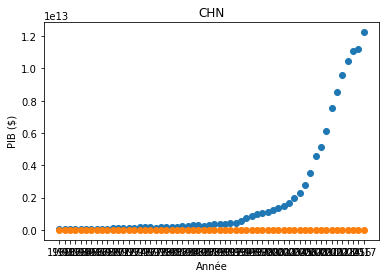

In [44]:
# Visualisation du FillNA
def ReplaceNA_PIB(df):
    dfavecna = df.fillna(0)
    dffillna = df.interpolate(method='linear', axis=0).ffill().bfill()
    dfdiff = dffillna - dfavecna
    plt.plot(dfavecna,'o')
    plt.plot(dfdiff,'o')
    plt.title(df.columns[0])
    plt.xlabel("Année")
    plt.ylabel("PIB ($)")
    return dffillna
    
dfssNA = ReplaceNA_PIB(df_pib2000.loc[:,["CHN"]])

In [45]:
# Recherche des pays ayant la plus forte variation de PIB
def MaxAmpPIB(df,Pays):
    return round(100*(df.loc[:,[Pays]].max()-df.loc[:,[Pays]].min())/df.loc[:,[Pays]].min(),1)
mARG = MaxAmpPIB(df_pib2000,"CHN")
mARG

CHN    25822.2
dtype: float64

In [46]:
for p in df_pib2000.columns:
    mag = MaxAmpPIB(df_pib2000,p)[0]
    if mag > 1000:
        print(p,mag)

AFG 3723.3
AGO 3183.0
ALB 1928.3
AND 5009.4
ARB 11259.9
ARE 2638.6
ARG 3388.5
ATG 1848.6
AUS 8372.9
AUT 6604.3
AZE 2365.0
BDI 1895.3
BEL 4452.9
BEN 4191.6
BFA 3645.7
BGD 5741.6
BHR 1060.8
BHS 7062.4
BIH 1422.0
BLZ 6535.2
BMU 7133.5
BOL 9932.3
BRA 17150.9
BRB 1433.6
BRN 16603.3
BTN 1763.6
BWA 57135.3
CAF 1857.6
CAN 4419.8
CHE 7347.2
CHL 6673.3
CHN 25822.2
CIV 7156.2
CMR 5547.4
COD 1215.9
COG 10850.7
COL 9372.9
CPV 1312.5
CRI 11855.0
CSS 3765.6
CUB 1601.2
CYP 5582.6
DEU 1713.2
DMA 1154.5
DNK 5554.7
DOM 11508.6
DZA 10582.7
EAP 22731.7
EAR 7328.2
EAS 15556.8
ECS 5325.2
ECU 6769.7
EGY 6627.6
EMU 5649.2
ESP 13443.7
ETH 1062.8
EUU 5230.2
FIN 5331.4
FJI 4405.7
FRA 4558.1
GAB 12755.5
GBR 4150.6
GHA 5098.5
GMB 3518.7
GNB 1614.8
GNQ 245326.2
GRC 7871.6
GRD 1476.2
GRL 3981.9
GTM 7146.1
GUY 2027.3
HIC 4664.0
HKG 25751.8
HND 6746.0
HPC 4178.7
HTI 3137.7
IBD 9811.2
IBT 9264.7
IDA 5537.3
IDB 8605.0
IDN 17815.7
IDX 4464.2
IND 7058.3
IRL 16989.9
IRN 14161.4
IRQ 13833.0
ISL 9757.1
ISR 13974.4
ITA 5819.8
